In [1]:
# feature extraction:
# creates the new features <= the number of features originally from the independent variables which gives most variance of the dataset without the dependent variables.
# As it does not considers the dependent variable it can be used for unspervised learning. WE can get 2 or 3 variables only so we can even visualise easily in 2 or 3 features easily.
# These indepnedent variables with highest variance so we can use them and also we cna use for visualization. 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from matplotlib.colors import ListedColormap
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
dataframe = pd.read_csv('Data/Wine.csv')

In [3]:
dataframe.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
dataframe.isna().sum()
# shows no null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

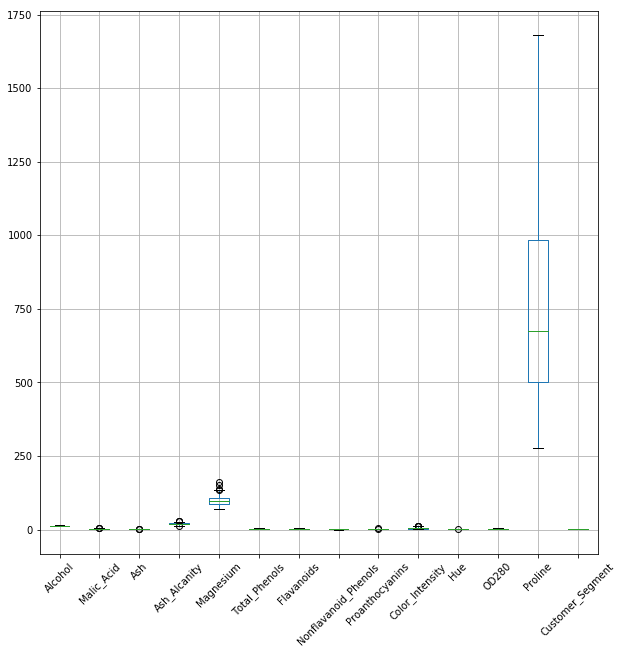

In [5]:
dataframe.boxplot(figsize=(10,10),rot=45)
# shows some anamoly in magnesium we'll try without removing outliers how much it shows

In [6]:
dataframe,test = train_test_split(dataframe,test_size=0.1)

In [7]:
test.to_csv('Data/test.csv')

In [8]:
test=None

In [9]:
X_train = dataframe.drop(['Customer_Segment'],axis=1)

In [10]:
X_train.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [11]:
Y_train = dataframe['Customer_Segment']

In [12]:
X_train.shape, Y_train.shape

((160, 13), (160,))

In [13]:
X_train,X_cross_val,Y_train,Y_cross_val = train_test_split(X_train,Y_train,test_size = 0.2,random_state=0)

In [14]:
X_train.shape

(128, 13)

In [15]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_cross_val = ss.transform(X_cross_val)

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# LDA: Extracts new n <= number of features in original, based on the classes of dependent variable. Hence it is a supervised dimentionality reduction model.
# n_component number of the components we want to extract from our dataset.
lda = LDA(n_components=2) # 2 new extracted features

X_train = lda.fit_transform(X_train,Y_train)
X_cross_val = lda.transform(X_cross_val)

In [17]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/admin1/anaconda3/envs/prayas_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = classifier.predict(X_cross_val)

In [19]:
np.array(Y_cross_val)

array([1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 2, 1, 1,
       1, 3, 3, 2, 3, 2, 3, 3, 3, 3])

In [20]:
y_pred

array([1, 2, 3, 1, 2, 3, 3, 2, 1, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 2, 1, 1,
       1, 3, 3, 2, 3, 2, 3, 3, 3, 3])

In [21]:
confusion_matrix(Y_cross_val,y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]])

In [22]:
print("accuracy by accuracy: {}".format(accuracy_score(Y_cross_val,y_pred)))

accuracy by accuracy: 0.96875


In [23]:
class plotting:
    def plotter(self,X_train,Y_train,classifier,title):
        X1_grid, X2_grid = np.meshgrid(np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01),
                                       np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01))

        plt.figure(figsize=(10,6))
        plt.contourf(X1_grid,X2_grid,classifier.predict(np.array([X1_grid.ravel(),X2_grid.ravel()]).T).reshape(X1_grid.shape)
                     ,alpha=0.75, cmap = ListedColormap(('#ff2a16','#35ff16','gold')))
        plt.title(title)
        plt.xlim(X1_grid.min(),X1_grid.max())
        plt.ylim(X2_grid.min(),X2_grid.max())
        for i,j in enumerate(np.unique(Y_train)):
            plt.scatter(X_train[Y_train==j,0],X_train[Y_train==j,1],
                        c = ListedColormap(('red','green','yellow'))(i),label=j)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


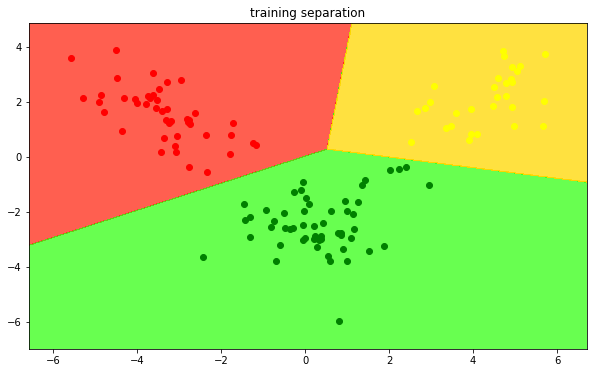

In [24]:
plot = plotting()
plot.plotter(X_train,Y_train,classifier,"training separation")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


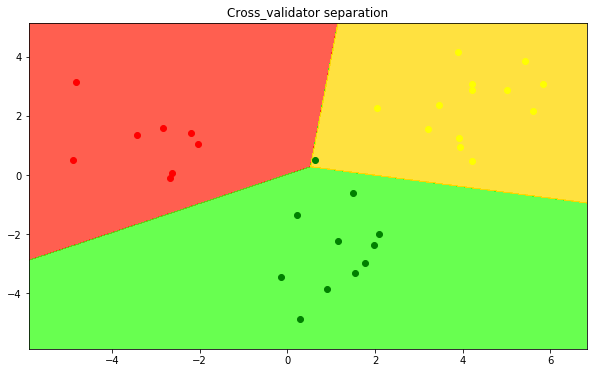

In [25]:
plot = plotting()
plot.plotter(X_cross_val,Y_cross_val,classifier,"Cross_validator separation")

In [26]:
with open('LDA/pickle/model.pkl','wb') as f:
    pickle.dump(ss,f)
    pickle.dump(lda,f)
    pickle.dump(classifier,f)
    pickle.dump(plot ,f)